In [63]:
import pickle
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.ticker as mticker
import numpy as np

from ecdf import draw_cdf_line

with open("attn_scores.pkl", "rb") as f:
    attn_scores = pickle.load(f)

In [64]:
def get_score_matrix(attn_scores, layer, head):
    scores_layer = attn_scores[layer]
    scores = scores_layer[0, head, :, :]
    return scores

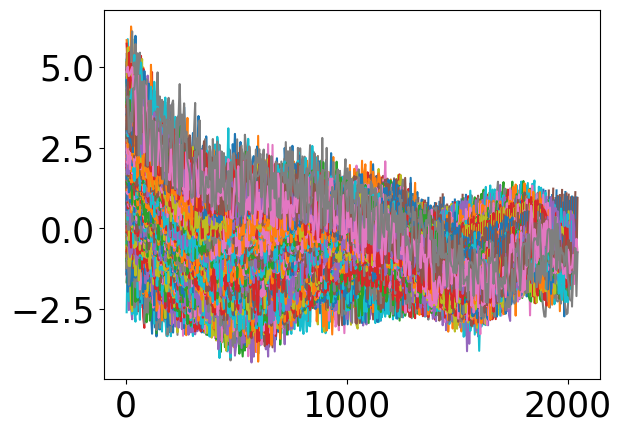

In [71]:
def draw_dist_scores(plt, attn_scores, layer):
    plt.clf()
    dist_step = 5
    attn_sc = attn_scores[layer]
    for tk_id in range(2048):
        dists = []
        scores = []
        dis = dist_step
        while dis <= 2048:
            left = tk_id - dis
            right = tk_id + dis
            sum = 0
            count = 0
            if left >= 0:
                for head in range(16):
                    sum += attn_sc[0, head, tk_id, left].item()
                    count += 1
            # if right < 2048:
            #     for head in range(16):
            #         sum += attn_sc[0, head, tk_id, right].item()
            #         count += 1
            if count > 0:
                avg_sc = sum / count
                dists.append(dis)
                scores.append(avg_sc)
            dis += dist_step
        plt.plot(dists, scores)
    plt.show()

draw_dist_scores(plt, attn_scores, 0)

In [12]:
def draw_global_scores(plt, attn_scores):
    plt.clf()
    parameters = {"xtick.labelsize": 25, "ytick.labelsize": 25}
    plt.rcParams.update(parameters)
    plt.figure(figsize=(10, 6))
    plt.subplots_adjust(left=0.17, bottom=0.2)
    colors = iter(cm.rainbow(np.linspace(0, 1, 24)))
    for layer in range(24):
        clr = next(colors)
        for head in range(16):
            scores = get_score_matrix(attn_scores, layer, head)
            data = []
            for i in range(scores.size(0)):
                tsr = scores[i, :]
                data.append(torch.min(tsr))
            if head == 0:
                draw_cdf_line(plt, data, min(data), max(data), line_clr=clr, line_label=f"Layer{layer}")
            else:
                draw_cdf_line(plt, data, min(data), max(data), line_clr=clr)
    plt.xlabel("Attention scores", fontsize=25)
    plt.ylabel("CDF of tokens", fontsize=25)
    plt.ylim(0, 1)
    def to_percent(temp, position):
        return '%1.0f'%(100*temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.legend(loc="best", ncols=3, fontsize=16, framealpha=0.3)
    plt.show()



<Figure size 640x480 with 0 Axes>

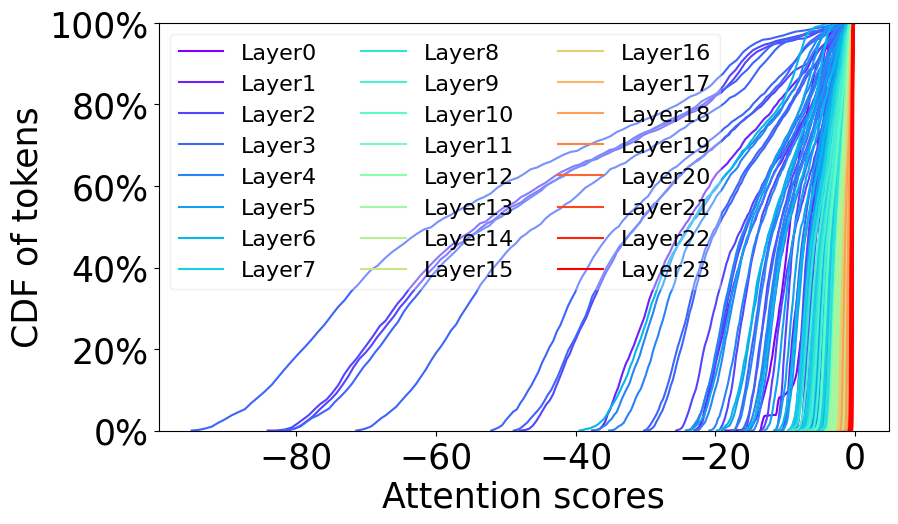

In [13]:
draw_global_scores(plt, attn_scores)

In [3]:
func_word_ids = [1, 2, 5, 8, 9, 15, 16, 22, 25, 26, 27, 31, 32, 36, 37, 38, 44, 47, 48, 49, 50, 51, 59, 60, 75, 81, 83, 85, 94, 95, 97, 100, 101, 113, 115, 116, 118, 129, 131, 142, 147, 154, 157, 159, 161, 162, 164, 165, 168, 170, 171, 180, 181, 183, 184, 186, 190, 192, 193, 197, 200, 201, 202, 208, 212, 214, 215, 218, 221, 224, 225, 228, 231, 232, 233, 234, 237, 238, 241, 248, 251, 255, 257, 260, 264, 266, 270, 275, 283, 287, 289, 293, 297, 302, 303, 305, 311, 312, 317, 323, 325, 326, 332, 337, 339, 342, 344, 345, 351, 352, 353, 355, 366, 375, 378, 381, 382, 383, 386, 397, 399, 400, 405, 409, 410, 417, 421, 422, 423, 425, 431, 440, 443, 444, 445, 451, 452, 454, 457, 459, 465, 466, 468, 469, 473, 481, 485, 488, 492, 498, 501, 503, 505, 513, 517, 519, 521, 525, 528, 531, 532, 536, 538, 541, 544, 547, 554, 562, 563, 567, 568, 572, 573, 577, 579, 580, 584, 585, 588, 591, 592, 593, 597, 599, 602, 604, 609, 610, 611, 614, 617, 618, 620, 624, 626, 628, 630, 635, 636, 638, 641, 642, 645, 650, 651, 655, 656, 665, 668, 679, 680, 686, 689, 690, 692, 693, 695, 699, 702, 703, 708, 710, 714, 718, 719, 720, 722, 726, 727, 736, 739, 744, 745, 749, 751, 752, 754, 755, 757, 760, 761, 762, 766, 767, 768, 776, 780, 781, 785, 786, 790, 792, 794, 796, 799, 800, 801, 802, 809, 810, 813, 815, 816, 821, 822, 825, 826, 829, 830, 834, 835, 839, 842, 844, 845, 847, 853, 855, 858, 860, 862, 869, 875, 877, 878, 880, 882, 885, 886, 888, 889, 892, 893, 894, 895, 898, 903, 904, 907, 908, 913, 914, 919, 933, 935, 938, 941, 948, 949, 951, 954, 955, 961, 963, 964, 965, 967, 968, 971, 974, 975, 976, 979, 981, 984, 985, 988, 996, 999, 1000, 1007, 1008, 1012, 1013, 1016, 1017, 1023, 1028, 1046, 1047, 1051, 1054, 1057, 1060, 1066, 1071, 1072, 1088, 1094, 1097, 1105, 1109, 1118, 1120, 1125, 1127, 1132, 1133, 1134, 1135, 1139, 1141, 1142, 1148, 1149, 1150, 1153, 1154, 1156, 1158, 1165, 1170, 1172, 1176, 1177, 1178, 1181, 1183, 1185, 1188, 1189, 1191, 1195, 1196, 1200, 1201, 1204, 1205, 1206, 1207, 1210, 1212, 1215, 1217, 1220, 1223, 1224, 1228, 1230, 1233, 1236, 1237, 1240, 1242, 1244, 1252, 1254, 1259, 1260, 1261, 1267, 1271, 1273, 1274, 1276, 1277, 1280, 1282, 1284, 1288, 1289, 1291, 1293, 1301, 1306, 1307, 1310, 1315, 1321, 1324, 1326, 1328, 1329, 1331, 1333, 1334, 1337, 1342, 1343, 1346, 1347, 1350, 1352, 1353, 1357, 1360, 1361, 1363, 1366, 1373, 1375, 1376, 1377, 1380, 1383, 1385, 1386, 1390, 1391, 1392, 1394, 1396, 1397, 1406, 1407, 1410, 1411, 1414, 1415, 1418, 1423, 1427, 1430, 1433, 1434, 1436, 1445, 1449, 1450, 1454, 1460, 1461, 1463, 1464, 1467, 1469, 1470, 1474, 1477, 1489, 1496, 1497, 1506, 1508, 1512, 1514, 1515, 1518, 1524, 1529, 1531, 1532, 1535, 1537, 1539, 1544, 1545, 1546, 1547, 1549, 1550, 1552, 1554, 1556, 1559, 1560, 1561, 1566, 1567, 1570, 1571, 1578, 1582, 1584, 1586, 1587, 1591, 1592, 1595, 1597, 1601, 1603, 1606, 1607, 1611, 1617, 1624, 1625, 1627, 1628, 1634, 1636, 1637, 1644, 1649, 1650, 1651, 1654, 1656, 1658, 1660, 1661, 1668, 1676, 1677, 1679, 1682, 1683, 1686, 1687, 1693, 1694, 1697, 1702, 1703, 1710, 1713, 1717, 1718, 1723, 1725, 1727, 1728, 1730, 1734, 1737, 1738, 1741, 1743, 1744, 1747, 1749, 1751, 1752, 1756, 1758, 1759, 1760, 1762, 1766, 1767, 1768, 1776, 1779, 1788, 1790, 1795, 1796, 1799, 1800, 1807, 1808, 1809, 1813, 1815, 1819, 1821, 1822, 1826, 1830, 1847, 1848, 1852, 1853, 1855, 1856, 1860, 1865, 1873, 1876, 1877, 1879, 1880, 1882, 1885, 1886, 1894, 1897, 1903, 1907, 1908, 1913, 1920, 1921, 1923, 1924, 1930, 1931, 1934, 1939, 1940, 1941, 1950, 1952, 1957, 1960, 1961, 1965, 1966, 1977, 1979, 1982, 1983, 1984, 1992, 1993, 1996, 1999, 2003, 2004, 2012, 2015, 2017, 2019, 2022, 2024, 2025, 2030, 2033, 2036, 2037, 2039, 2040, 2045]

In [44]:
func_word_ids = [16, 27, 32, 83, 95, 101, 165, 168, 201, 266, 287, 293, 302, 326, 400, 417, 423, 469, 580, 593, 599, 602, 618, 624, 630, 636, 668, 686, 693, 720, 727, 745, 781, 875, 878, 886, 889, 965, 996, 1023, 1060, 1183, 1189, 1196, 1237, 1252, 1301, 1310, 1347, 1353, 1357, 1376, 1386, 1415, 1436, 1512, 1515, 1529, 1561, 1571, 1578, 1592, 1651, 1658, 1694, 1703, 1713, 1728, 1744, 1747, 1776, 1800, 1809, 1822, 1860, 1877, 1880, 1913, 1921, 2015, 2025, 2030, 2040, 2045]

In [46]:
def draw_token_scores(plt, attn_scores, layer, head):
    plt.clf()
    parameters = {"xtick.labelsize": 25, "ytick.labelsize": 25}
    plt.rcParams.update(parameters)
    plt.figure(figsize=(10, 6))
    plt.subplots_adjust(left=0.17, bottom=0.2)
    # colors = iter(cm.rainbow(np.linspace(0, 1, 24)))
    scores = get_score_matrix(attn_scores, layer, head)
    for i in range(scores.size(0)):
        # clr = next(colors)
        if i not in func_word_ids:
            tk_tsr = scores[i, :]
            data = [x.item() for x in tk_tsr]
            draw_cdf_line(plt, data, min(data), max(data))
    for i in func_word_ids:
        tk_tsr = scores[i, :]
        data = [x.item() for x in tk_tsr]
        draw_cdf_line(plt, data, min(data), max(data), line_clr="black")
    plt.xlabel("Attention scores", fontsize=25)
    plt.ylabel("CDF of tokens", fontsize=25)
    plt.ylim(0, 1)
    def to_percent(temp, position):
        return '%1.0f'%(100*temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    # plt.legend(loc="best", ncols=3, fontsize=16, framealpha=0.3)
    plt.show()

<Figure size 640x480 with 0 Axes>

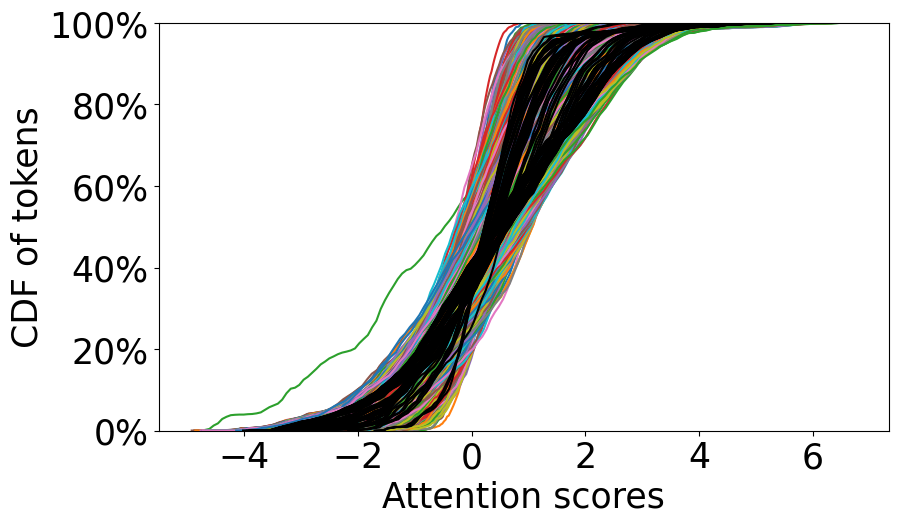

In [47]:
draw_token_scores(plt, attn_scores, 0, 0)

<Figure size 640x480 with 0 Axes>

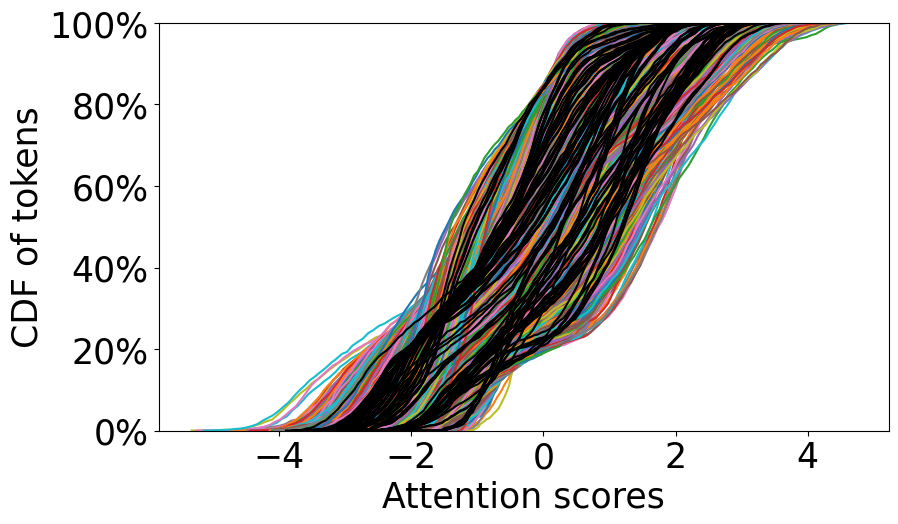

In [48]:
draw_token_scores(plt, attn_scores, 0, 4)

<Figure size 640x480 with 0 Axes>

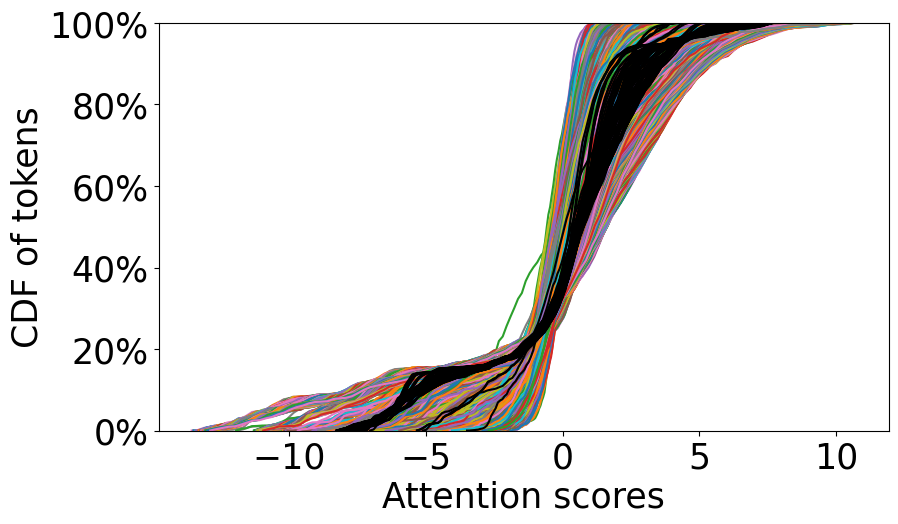

In [49]:
draw_token_scores(plt, attn_scores, 0, 8)

<Figure size 640x480 with 0 Axes>

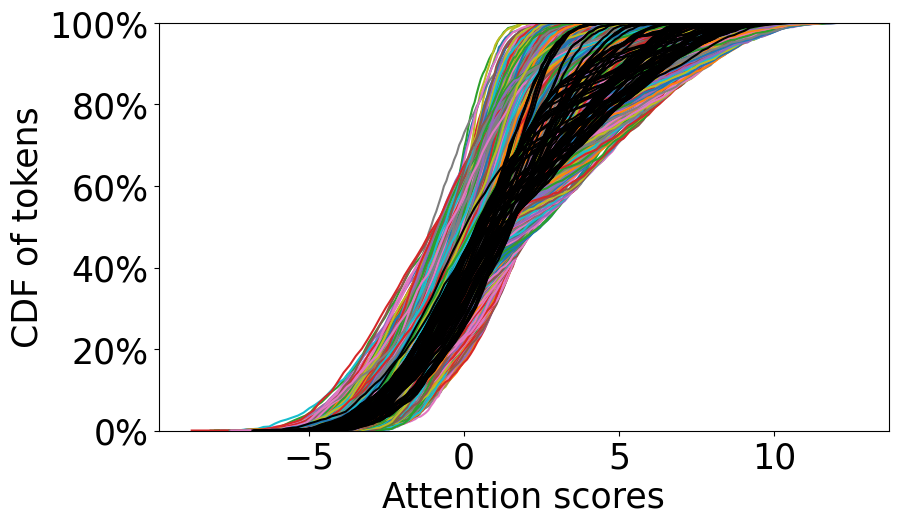

In [50]:
draw_token_scores(plt, attn_scores, 0, 15)

<Figure size 640x480 with 0 Axes>

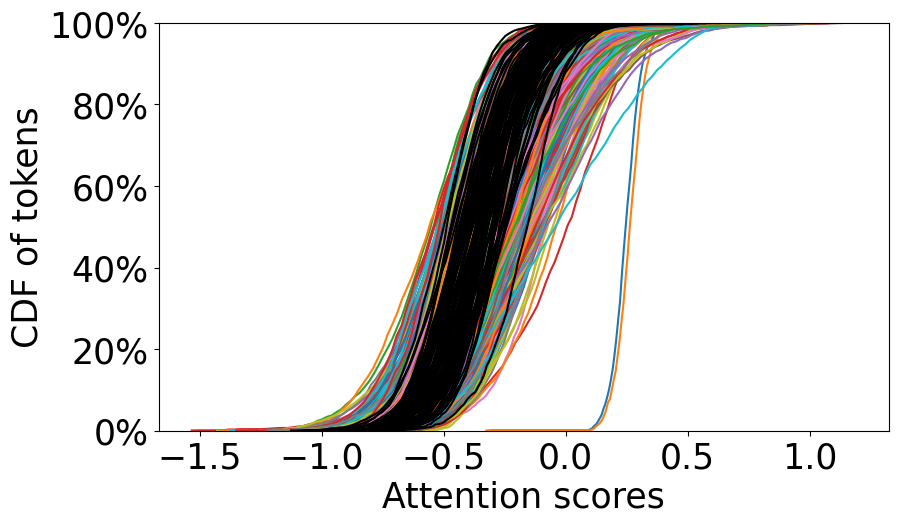

In [51]:
draw_token_scores(plt, attn_scores, 8, 0)

<Figure size 640x480 with 0 Axes>

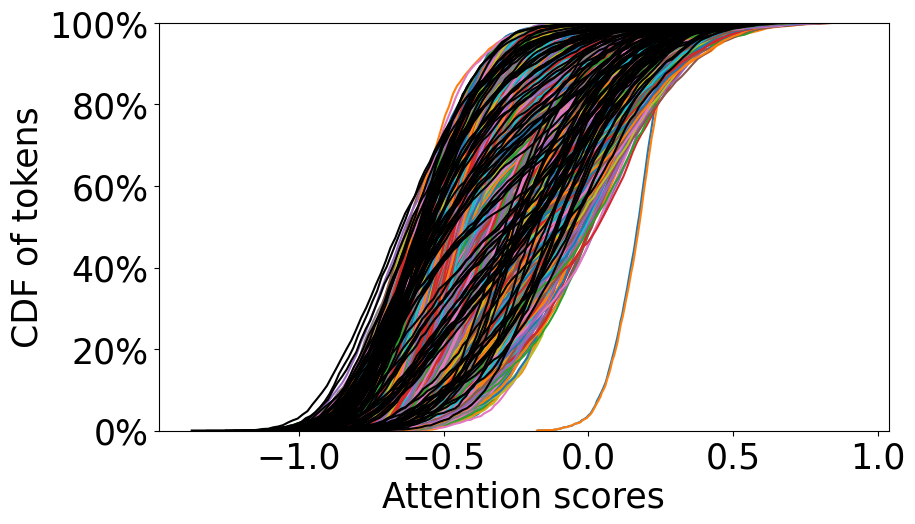

In [52]:
draw_token_scores(plt, attn_scores, 8, 4)

<Figure size 640x480 with 0 Axes>

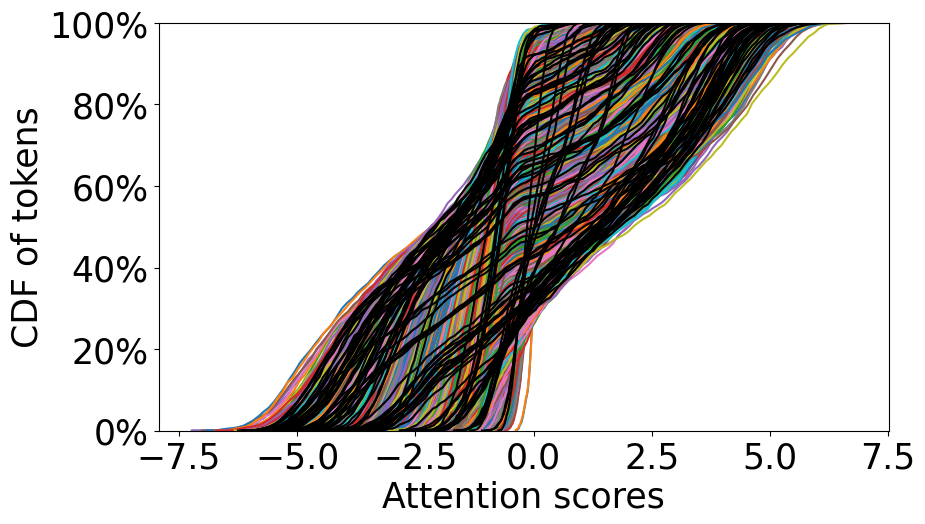

In [53]:
draw_token_scores(plt, attn_scores, 8, 8)

<Figure size 640x480 with 0 Axes>

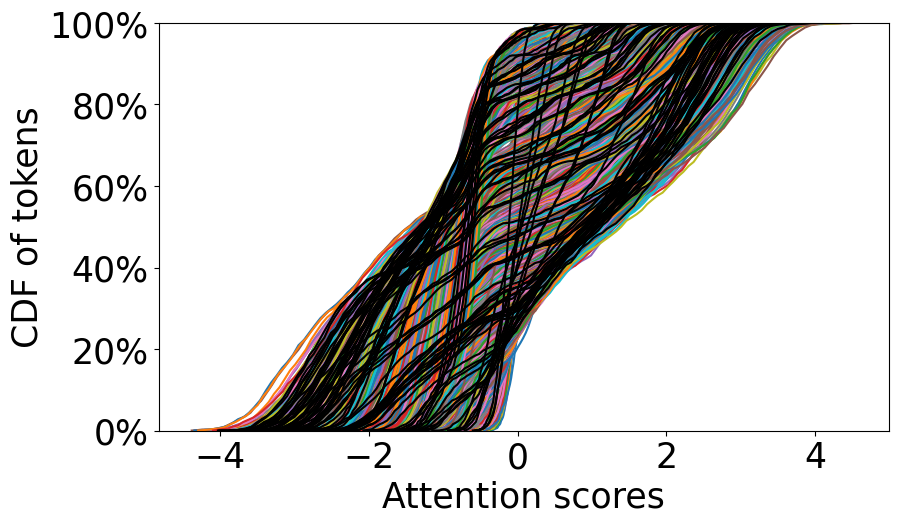

In [54]:
draw_token_scores(plt, attn_scores, 8, 15)

<Figure size 640x480 with 0 Axes>

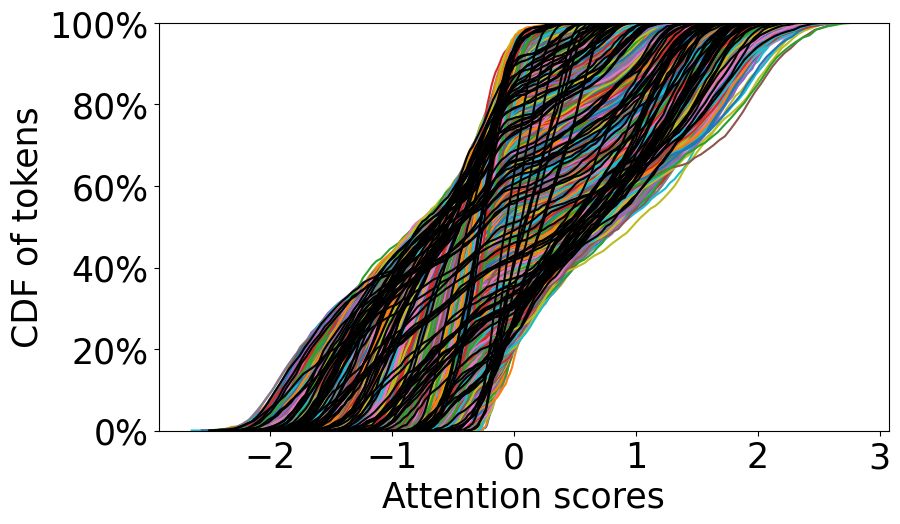

In [55]:
draw_token_scores(plt, attn_scores, 16, 0)

<Figure size 640x480 with 0 Axes>

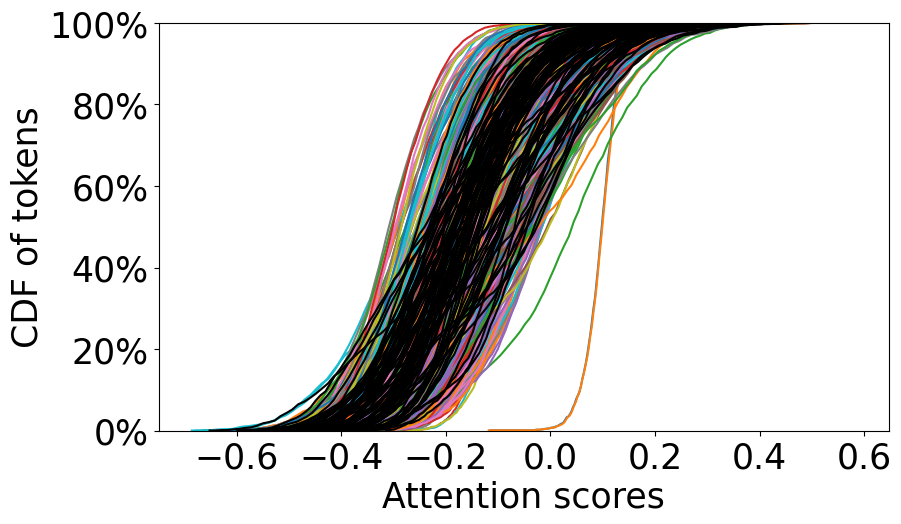

In [56]:
draw_token_scores(plt, attn_scores, 16, 4)

<Figure size 640x480 with 0 Axes>

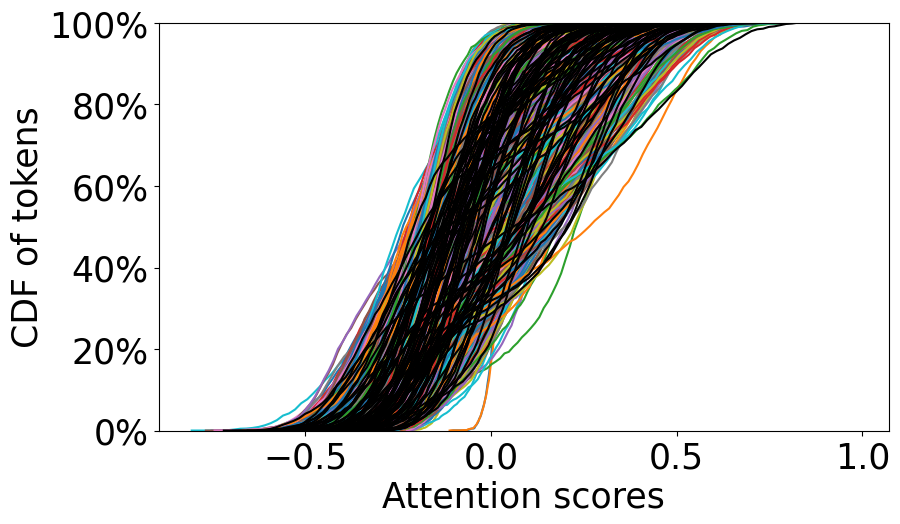

In [57]:
draw_token_scores(plt, attn_scores, 16, 8)

<Figure size 640x480 with 0 Axes>

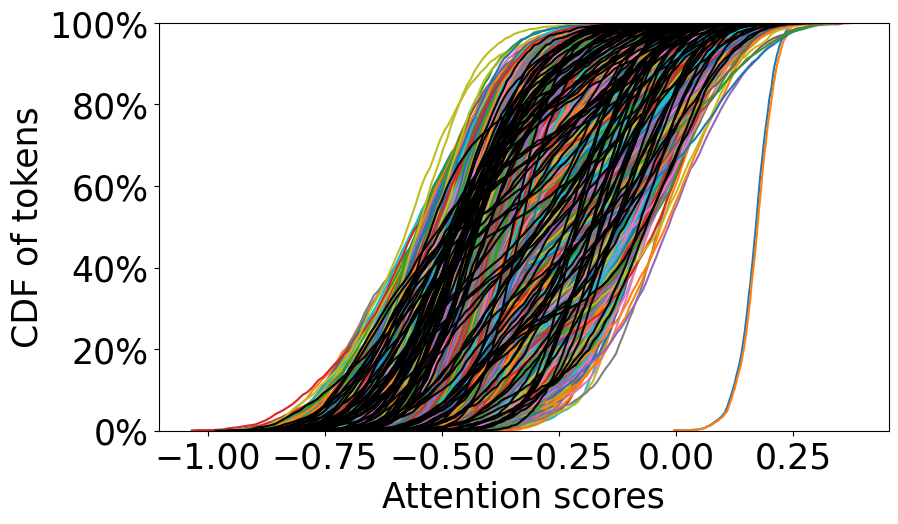

In [58]:
draw_token_scores(plt, attn_scores, 16, 15)

<Figure size 640x480 with 0 Axes>

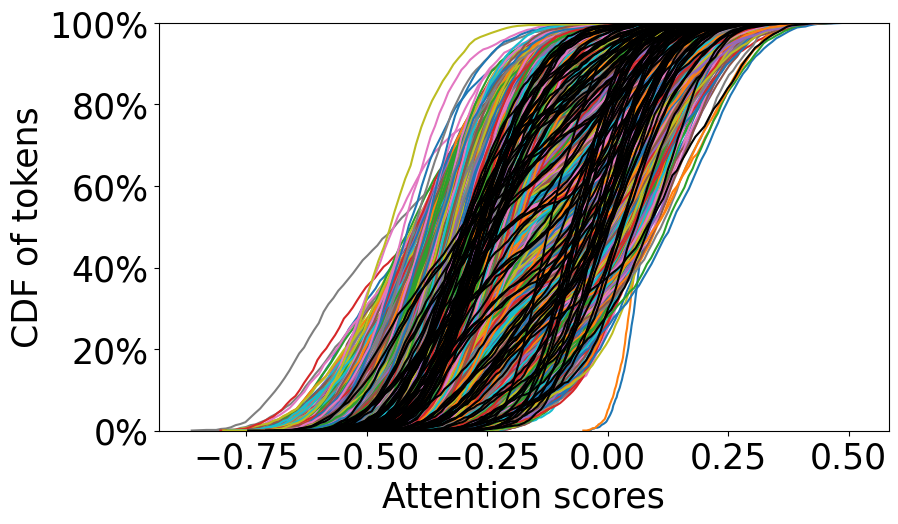

In [59]:
draw_token_scores(plt, attn_scores, 23, 0)

<Figure size 640x480 with 0 Axes>

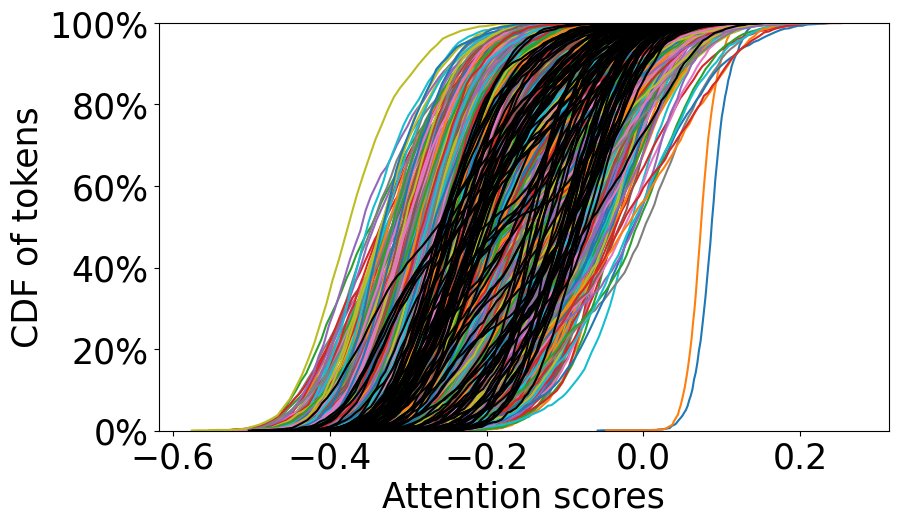

In [60]:
draw_token_scores(plt, attn_scores, 23, 4)

<Figure size 640x480 with 0 Axes>

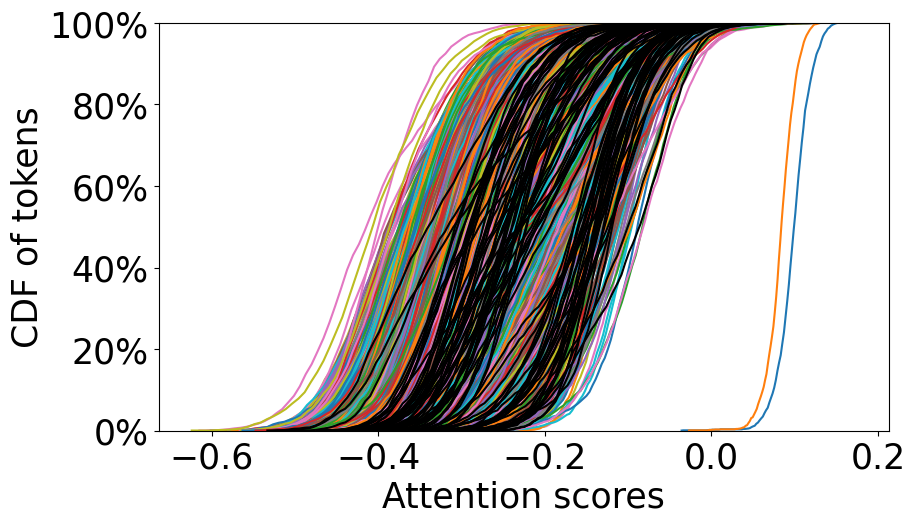

In [61]:
draw_token_scores(plt, attn_scores, 23, 8)

<Figure size 640x480 with 0 Axes>

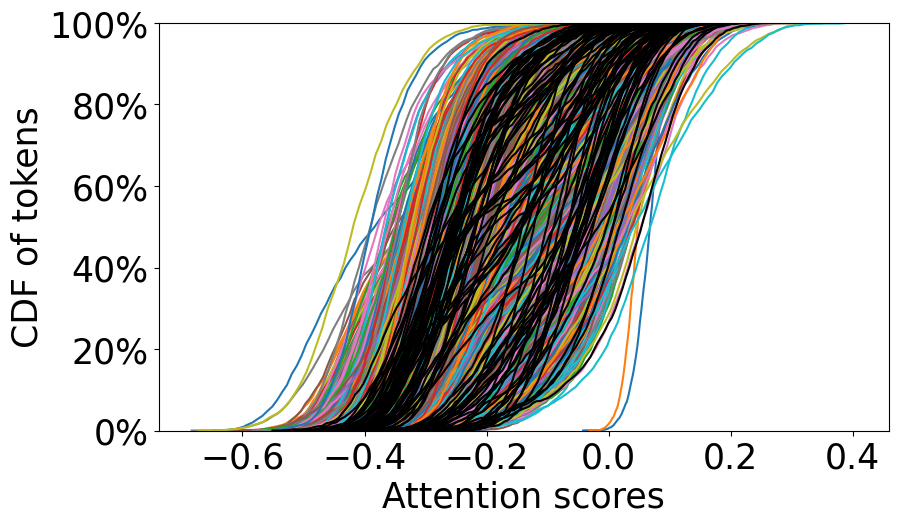

In [62]:
draw_token_scores(plt, attn_scores, 23, 15)